# Human labeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import matplotlib, seaborn
import h5py
import scipy


In [2]:
# check the path 

dataset =         pd.read_hdf("/home/kmisiunas/Data/DNA_barcode/dataset.hdf5")
datasetTestEven = pd.read_hdf("/home/kmisiunas/Data/DNA_barcode/datasetTestEven.hdf5")
datasetTestOdd =  pd.read_hdf("/home/kmisiunas/Data/DNA_barcode/datasetTestOdd.hdf5")
datasetTestMix =  pd.read_hdf("/home/kmisiunas/Data/DNA_barcode/datasetTestMix.hdf5")
datasetWithAntibodies =  pd.read_hdf("/home/kmisiunas/Data/DNA_barcode/datasetIndividualWithAntibodies.hdf5")
datasetMultiplexed =  pd.read_hdf("/home/kmisiunas/Data/DNA_barcode/datasetMultiplexed.hdf5")
datasetExtra =    pd.read_hdf("/home/kmisiunas/Data/DNA_barcode/datasetExtra.hdf5")

def saveAllDatasets():
    dataset.to_hdf("/home/kmisiunas/Data/DNA_barcode/dataset.hdf5", "single", mode = 'w')
    datasetTestOdd.to_hdf("/home/kmisiunas/Data/DNA_barcode/datasetTestOdd.hdf5", "single", mode = 'w')
    datasetTestEven.to_hdf("/home/kmisiunas/Data/DNA_barcode/datasetTestEven.hdf5", "single", mode = 'w')
    datasetTestMix.to_hdf("/home/kmisiunas/Data/DNA_barcode/datasetTestMix.hdf5", "single", mode = 'w')
    datasetWithAntibodies.to_hdf("/home/kmisiunas/Data/DNA_barcode/datasetIndividualWithAntibodies.hdf5", "single", mode = 'w')
    datasetMultiplexed.to_hdf("/home/kmisiunas/Data/DNA_barcode/datasetMultiplexed.hdf5", "single", mode = 'w')

In [12]:
# save old human labels

dataset.human_barcode.to_csv("human_labels_2018-01-26_karolis.csv")

In [3]:
from IPython.display import display
import ipywidgets as widgets
from IPython import display as dp

labels = np.array(['000', '001', '010', '011', '100', '101', '110', '111'])

ds = dataset 
ds["human_barcode"] = ''

selection = ds[ds.Filter].sample()
last_selection = selection

button_back = widgets.Button(description="< Back")
button_skip = widgets.Button(description="Skip >")
button_barcodes = list( [widgets.Button(description=name) for name in labels])

out = widgets.Output()

def formatHumanImpot(text):
    "maked database easier to read"
    if text == "Skip >": return "skip"
    else: return text

def plot():
    with out:
        #pyplot.clear_output(True)
        dp.clear_output(wait=True)
        pyplot.title("n="+str((ds.human_barcode != '').sum()))
        pyplot.plot(selection.iloc[0].trace)
        pyplot.show()
    
# add functionality
def on_button_next(button):
    global selection, last_selection, ds
    # add choise
    choise = formatHumanImpot( button.description )
    ds.at[selection.index[0], "human_barcode"] = choise
    # change plot
    last_selection = selection
    selection = ds[ds.Filter].sample()
    #print("Button clicked.")
    plot()
        
def on_button_back(button):
    global selection, last_selection, ds
    # change plot
    selection = last_selection
    plot()
    
button_back.on_click(on_button_back)
button_skip.on_click(on_button_next)
for button in button_barcodes:
    button.on_click(on_button_next)

# diplay all 
display(
    widgets.HBox([button_back, button_skip]),
    widgets.HBox(button_barcodes[:])
)


plot()    
out

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [8]:
# save all

dataset = ds

saveAllDatasets()

In [11]:
sel  = (ds.human_barcode != '')

correct = ds[sel].barcode == ds[sel].human_barcode
guesses = ds[sel].human_barcode != 'skip'
skips = ds[sel].human_barcode == 'skip'


print("Correct  : ", correct.sum())
print("Guesses  : ", guesses.sum())
print("Skips    : ", skips.sum())
print("Total    : ", guesses.sum() + skips.sum())
print("Precision: ", correct.sum()/guesses.sum())
print("Recall   : ", correct.sum()/(guesses.sum()+ skips.sum()))
print("Data dis.: ", skips.sum()/(guesses.sum()+ skips.sum()))


Correct  :  220
Guesses  :  225
Skips    :  275
Total    :  500
Precision:  0.977777777778
Recall   :  0.44
Data dis.:  0.55


# Sensing region 

In [7]:
# prepare mixed dataset

print( datasetWithAntibodies.shape )
print( dataset.shape )

ds = pd.concat([datasetWithAntibodies, dataset], ignore_index=True)
ds.shape

(41936, 27)
(41560, 28)


(83496, 28)

In [71]:
from IPython.display import display
import ipywidgets as widgets
from IPython import display as dp

labels = np.array(['Bound', 'UN-bound'])

ds["human_binding"] = ''

selection = ds[ds.Filter].sample()
last_selection = selection

button_back = widgets.Button(description="< Back")
button_skip = widgets.Button(description="Skip >")
button_barcodes = list( [widgets.Button(description=name) for name in labels])

out = widgets.Output()

def formatHumanImpot(text):
    "maked database easier to read"
    if text == "Skip >": return "skip"
    else: return text

def plot():
    with out:
        #pyplot.clear_output(True)
        dp.clear_output(wait=True)
        pyplot.title("n="+str((ds.human_binding != '').sum()))
        pyplot.plot(selection.iloc[0].trace)
        pyplot.show()
    
# add functionality
def on_button_next(button):
    global selection, last_selection, ds
    # add choise
    choise = formatHumanImpot( button.description )
    ds.at[selection.index[0], "human_binding"] = choise
    # change plot
    last_selection = selection
    selection = ds[ds.Filter].sample()
    #print("Button clicked.")
    plot()
        
def on_button_back(button):
    global selection, last_selection, ds
    # change plot
    selection = last_selection
    plot()
    
button_back.on_click(on_button_back)
button_skip.on_click(on_button_next)
for button in button_barcodes:
    button.on_click(on_button_next)

# diplay all 
display(
    widgets.HBox([button_back, button_skip]),
    widgets.HBox(button_barcodes[:])
)


plot()    
out

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [13]:
sel  = (ds.human_binding != '') & (~ds.human_binding.isna())

correct = (ds[sel].Bound & (ds[sel].human_binding == 'Bound')) | ((~ds[sel].Bound) & (ds[sel].human_binding == 'UN-bound'))
guesses = ds[sel].human_binding != 'skip'
skips = ds[sel].human_binding == 'skip'


print("Correct  : ", correct.sum())
print("Guesses  : ", guesses.sum())
print("Skips    : ", skips.sum())
print("Total    : ", guesses.sum() + skips.sum())
print("Precision: ", correct.sum()/guesses.sum())
print("Recall   : ", correct.sum()/(guesses.sum()+ skips.sum()))
print("Data dis.: ", skips.sum()/(guesses.sum()+ skips.sum()))


Correct  :  203
Guesses  :  218
Skips    :  283
Total    :  501
Precision:  0.93119266055
Recall   :  0.405189620758
Data dis.:  0.564870259481


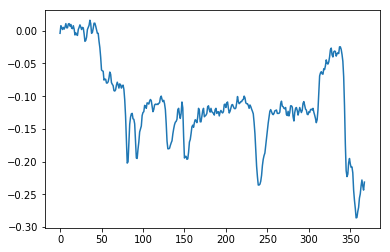

Human: Bound
Label: True


In [107]:
# inspection

sel  = (ds.human_binding != '') & (ds.human_binding != 'skip')

i = i + 1

pyplot.plot(ds[sel].iloc[i].trace)
pyplot.show()
print("Human:", ds[sel].iloc[i].human_binding)
print("Label:", ds[sel].iloc[i].Bound)

In [14]:
# save results

ds[ ["Bound", "human_binding"]].to_csv("human_labels_binding_2018-01-26_karolis.csv")

In [9]:
#from_file = pd.read_csv("human_labels_binding_2018-01-26_karolis.csv", index_col=0 )

#ds['human_binding'] = from_file.human_binding.